In [1]:
import os
os.chdir("/content/drive/MyDrive/NLP/DeepLearningForText&Sequences")
print(f"Current working directory is: {os.getcwd()}")

Current working directory is: /content/drive/MyDrive/NLP/DeepLearningForText&Sequences


# Working with text data

- Text is one of the most widespread forms of sequences data.

- It can be understood as either a sequence of characters or a seuence of words, but it's most common to work at the level of words.

- Deep Learning models do not truly understand text in a human sense; rather, these models can map the statistical structure of written language, which is sufficient to solve many simple textual tasks.

- Deep Learning for natural-language processing is pattern recognition applied to words, sentences, and paragraphs, in much the same way that computer vision is pattern recognition applied to pixels.

- Like all other neural networks, deep-learning models don't take as input raw text: they only work with numeric tensors.

- Vectorizing text is the process of transforming text into numeric tensors.

- This can be done in multiple ways:
 - Segment text into words, and transform each word into a vector.
 - Segment text into characters, and transform each n-gram into a vector.
 - Extract n-grams of words or characters, and transform each n-gram into a vector. N-grams are overlapping groups of multiple cosecutive words or characters.

- Collectively, the different units into which we can break down text (words, characters, or n-grams) are called tokens, and breaking text into such is called tokenization.

- All text-vectorization process consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens.

- These vectors, packed into sequence tensors, are fed into deep neural networks.

- There are multiple ways to associate a vector with a token. We will cover two major ones: (1) one-hot-encoding of token, (2) token embedding (typically used exclusively for words, and called word embedding).

## One-hot encoding of words and characters

- One-hot is the most common, most basic way to turn a token into a vector.

- It consists of associating a unique integer index with every word and then turning this integer index i into a binary vector of size N (the size of the vocabulary); the vector is all zero except for the ith entry,which is 1.

### Word-level one-hot encoding (toy example)

In [ ]:
import numpy as np

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
samples    # a sample is a sentence, but it could be an entire document

['The cat sat on the mat.', 'The dog ate my homework.']

In [ ]:
token_index = {}    # Build an index of all token in the data
for sample in samples:
  for word in sample.split():     # Tokenizes the samples via the split method. In real life, We also strip punctuation and special characters from the samples.
    if word not in token_index:
      token_index[word] = len(token_index) + 1  # Assign a unique index to each unique word. Note that we don't attribute index 0 to anything.

In [ ]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [ ]:
max_length = 10
results = np.zeros(shape =(len(samples), max_length, max(token_index.values()) + 1))

In [ ]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

### Character-level one-hot encoding (toy example)

In [ ]:
import string

In [ ]:
samples = ["The cat sat on the mat.", 'The dog ate my homework.']

In [ ]:
characters = string.printable   # All printable ASCII characters

In [ ]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
token_index = dict(zip(range(1, len(characters)  + 1), characters))

In [ ]:
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

In [ ]:
for i, samples in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1

In [ ]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

- Now that keras has built-in utilities for doing one-hot encoding of text at the word level or character level, starting from raw text data. 

- We should use these utilities, because they take care of a number of important features such as stripping special characters from strings and only taking into account the N most common words in your dataset ( a common restriction, to avoid dealing with very large input vector spaces).

### Using keras for word-level one-hot encoding

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [ ]:
tokenizer = Tokenizer(num_words=1000)  # Creates a tokenizer, configured to only take into account the 1000 most common words

In [ ]:
tokenizer.fit_on_texts(samples)   # Build the word index

In [ ]:
tokenizer.word_index   # Can recover the word index that was computed

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [ ]:
sequences = tokenizer.texts_to_sequences(samples)  # Turns strings into lists of integer indices

In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
tokenizer.sequences_to_matrix(sequences, mode='binary')

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')  # One-hot binary representations

In [ ]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


### Words-level one-hot encoding with hashing trick (toy example)

- A variant of one-hot encoding is the so-called one-hot hashing trick, which we can use when the number of unique token in our vocabulary is too large to handle explicitly.

- Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, we can hash words into vectors of fixed size.

- This is typically done with a very lightweight hashing function.

- The main advantage of this method is that it does away with mainaining an explicit word index, which saves memory and allows online encoding of the data (we can generate token vectors right away, before we have seen all the available data).

- The one drawback of this approach is that it's susceptible to **hash collisions**: two different words may end up with same hash, and subsequently any machine-learning model looking at these hashes won't be able to tell the difference between these words.

- The likelihood of **hash collisions** decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [ ]:
dimensionality = 1000  # stores the word as vectors of size 1000
max_length = 10

In [ ]:
results = np.zeros((len(samples), max_length, dimensionality))

In [ ]:
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality  # hashes the word into a random integer index between 0 and 1000
    results[i, j, index] = 1

In [ ]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## Using word embeddings

- Another popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings.

- Whereas the vectors obtained through one-hot encoding are binary sparse (mostly made of zeros), and very high-dimensional (same dimensionality as the number of words in the vocabulary).

- Word embeddings are low-dimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors).

- Unlike the word vectors obtained via one-hot encoding, word embeddings are learned from data.

- It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with large vocabularies.

- On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in this case).

- So, word embeddings pack more information into far fewer dimensions.

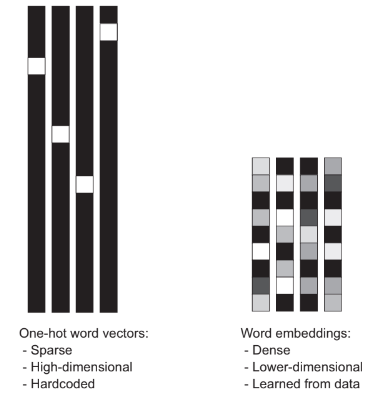

#### There are two ways to obtain word embeddings:
- Learn word embeddings jointly with the main task we are care about (such as document classification or sentiment prediction). In this setup, we start with random word vectors and then learn word vectors in the same way we learn the weights of a neural network.

- Load into our model word embeddings that were precomputed using a different machine-learning task than the one we are trying to solve. These are called pretrained word embeddings.

### Learning word embeddings with the embedding layer

- The Simplest way to associate a dense vector with a word is to choose the vector at random. The problem with this approach is that the resulting embedding space has no structure: for instance, the words accurate and exact may end up with completely different embeddings, even though they are interchangeable in most sentences. It is difficult for a deep neural network to make sense of such a nosiy, unstructured embedding space.


- To get a bit more abstract, the geometric relationships between word vectors should reflect the semantic relationships between these words.

- Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect synonyms to be embedded into similar word vectors; and in general, we would expect the geometric distance (Such as L2 distance) between any two words vectors to relate to the semantic distance between the associated words (words meaning different things are embedded at points far away from each other, whereas related words are closer) In specific to distance, we may want specific **direction** in the embedding space to be meaningful.

- Pragmatically, what makes a good word-embedding space depends heavily on our task. Because the importance of certain semantic relationships varies from task to task. Thus it is reasonable to learn a new embedding space with every new task.

In [ ]:
## Instantiating an Embedding layer
from keras.layers import Embedding

In [ ]:
embedding_layer = Embedding(1000, 64)   # 1000: number of possible token (here,  1000: 1 + maximum word index), 64: the dimensionality of the embedding

- The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integer as input, it looks up these integers in an internal dictionary, and it returns the associated vectors. It is effectively a dictionary lookup.

- Word index -------> Embedding layer ---------> Corresponding word vector

- The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each enrty is a sequence of integers. 

- It can embed sequences of variable length.

- All sequences in a batch must have the same length, though (because we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be turncated.

- This layer returns a 3D floating-point tensor of shape (samples, sequence_length, embedding_dimensionality). Such a 3D tensor can then be processed by an RNN layer or a 1D convolution layer.

- When we instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just as with any other layer. During training, these word vectors are gradually adjusted via backpropagation, structuring the space into something the downstream model can exploit.

- Once fully trained, the embedding space will show a lot of structure----a kind of structure specialized for the specific problem for which we are training our model.

In [ ]:
## Loading the IMDB data for use with an Embedding layer

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000    # Number of words to consider as features
maxlen = 20       # Cuts off the text after 20 number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)   # Loads the data as list of integers

In [ ]:
## Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
from keras.utils import pad_sequences


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

#### Using an Embedding layer and classifer on the IMDB data

In [ ]:
from  keras.models import Sequential
from keras.layers import Flatten, Dense

embedding_layer = Embedding(max_features, 8, input_length=maxlen)
model = Sequential()
model.add(embedding_layer)

model.add(Flatten())  # Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen*8)

model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer= 'rmsprop',
              loss= 'binary_crossentropy',
              metrics= ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6744 - acc: 0.6071 - val_loss: 0.6251 - val_acc: 0.7036
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5465 - acc: 0.7502 - val_loss: 0.5236 - val_acc: 0.7342
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4622 - acc: 0.7883 - val_loss: 0.4970 - val_acc: 0.7486
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4225 - acc: 0.8093 - val_loss: 0.4922 - val_acc: 0.7566
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3967 - acc: 0.8232 - val_loss: 0.4903 - val_acc: 0.7592
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3750 - acc: 0.8340 - val_loss: 0.4929 - val_acc: 0.7568
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3557 - acc: 0.8466 - val_loss: 0.4982 - val_acc: 0.7580
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

- We get to a validation accuracy of ~ 76%, which is pretty good considering that we are only looking at the first 20 words in every review.

- But note that merely flattening the embedded sequences and training a single Dense layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure.

- It is much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.

### Using Pretrained Word Embeddings

- Sometimes, we have so little training data available that we can't use our data alone to leann an appropriate task- specific embedding of our vocabulary.

- Instead of learning word embeddings jointly with the problem we want to solve, we can load embedding vectors from a precomputed embedding space that we know is highly structured and exhibits useful properties----that captures generic aspects of language structure.

- The rationale behind using pretrained word embedding in natural-language processing is much the same as for using pretrained convnets in image classification: We don't have enough data available to learn truly powerful features on our own, but we expect the features that we need to be fairly generic---that is, common visual features or semantic features. In this case, it makes sense to reuse features learned on a different problem.

- Such word embedding are generally computed using word-occurence statistics (observations about what words co-occur in sentences or documents), using variety of techniques, some involving neural networks, other not.

--------------------------------------------------------------------------------
- The idea of a dense, low-dimensional embedding space for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s.




- There are various precomputed database of word embedding that we can download and use in keras Embedding layer:

 - Word2vec, developed by Tomas Mikolov at Google in 2013. Word2vec dimensions capture specific semantic properties such as gender.

 - GloVe: Global Vectors for Word Representation, developed by stanford researchers in 2014. This embedding technique is based on factorizing a matrix of word co-occurence statistics. Its developers have made available precomputed embeddings for millions of English tokens, obtained from Wikipedia data and common Crawl data.


## Putting it all together: from raw text to word embeddings

### Downloading the IMDB Data as Raw text

- Go to [Dataset Link](http://mng.bz/0tIo) and download the raw IMDB dataset. 
- Uncompress it.

In [ ]:
import urllib.request as req
from zipfile import ZipFile


SOURCE_URL = "http://mng.bz/0tIo"

DESTINATION = "data"

os.makedirs(DESTINATION, exist_ok=True)

data_file = "data.zip"

DESTINATION_ZIP_PATH = os.path.join(DESTINATION, data_file)

filename, _ = req.urlretrieve(SOURCE_URL, DESTINATION_ZIP_PATH)

In [ ]:
with ZipFile(filename, "r") as zip_f:
  zip_f.extractall("data/")

In [2]:
# Processing the labels of the raw IMDB data

imdb_dir = 'data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [3]:
len(texts)

8253

In [4]:
# Tokenizing the text of the raw IMDB data

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 100  # Cuts off reviews after 100 words
training_samples = 200  # Trains on 200 samples
validation_samples = 10000  # Validates on 10,000 samples
max_words = 10000  # Considers only top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [5]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 51090 unique tokens.


In [6]:
data = pad_sequences(sequences, maxlen=maxlen)

In [7]:
data

array([[ 200,   14,   12, ...,  111,    5,   70],
       [ 348,   48, 5032, ...,  757,   15, 1763],
       [   3,    2, 2742, ..., 1928,  408, 7213],
       ...,
       [1518,    7,    2, ...,  181,  441,  167],
       [ 231,    5,  121, ...,    4,    1,  689],
       [ 185,   16,    7, ...,    2,  206,  810]], dtype=int32)

In [8]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (8253, 100)
Shape of label tensor: (8253,)


In [9]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [10]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

#### Downloading The Glove Embeddings

- Go to http://nlp.stanford.edu/projects/glove and download the precomputed embedding from 2014 English Wikipedia.

- It is an 822 MB zip file called glove.

- 6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens).

- Unzip it.

#### Preprocessing The Embedding

- Let's parse the unzipped file (a.txt file) to build an index that maps (as strings) to their vector representation (as number vectors).

In [11]:
# Parsing the Glove word-embeddings file

glove_dir = "/content/drive/MyDrive/NLP/DeepLearningForText&Sequences/GLOVE"

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [19]:
embeddings_index["competition"]

array([ 0.47787  ,  0.11797  ,  0.22625  , -0.10685  ,  0.072614 ,
       -0.62838  , -0.35476  ,  0.33886  , -0.44855  , -0.21369  ,
        0.0030331, -0.28199  , -0.061722 , -0.41975  , -0.58461  ,
        0.037724 , -0.16208  ,  0.651    , -0.28643  ,  0.063731 ,
       -0.67791  , -0.26084  ,  0.81688  ,  0.18427  ,  0.43563  ,
       -0.14075  , -0.4906   , -0.61992  ,  0.22755  , -0.13513  ,
       -0.87606  ,  0.39527  , -0.0354   , -0.85223  ,  0.83129  ,
       -0.2642   , -0.33737  ,  0.36903  , -1.1659   , -0.14264  ,
       -0.039069 , -0.53922  , -0.74432  , -0.14824  ,  0.56037  ,
       -0.046834 ,  0.50559  , -0.73775  ,  0.021366 , -0.58268  ,
       -0.62358  ,  0.13552  , -0.52722  ,  0.80974  ,  0.42585  ,
       -2.4453   , -0.39579  ,  0.16172  ,  1.4491   ,  0.36109  ,
       -0.4249   ,  0.16247  , -0.35186  ,  0.79198  ,  0.21762  ,
       -0.26828  , -0.15643  ,  0.14562  ,  0.72407  , -0.25763  ,
        0.35769  , -0.44535  ,  0.017563 ,  0.56838  , -0.1190

- Next, we’ll build an embedding matrix that we can load into an Embedding layer. 

- It must be a matrix of shape (max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word of index i in the reference word index (built during tokenization). 

- Note that index 0 isn’t supposed to stand for any word or token—it’s a placeholder.

In [23]:
# Preparing the GloVe word-embeddings matrix

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector    # Words not found in the embedding index will be all zeros

In [30]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

#### **DEFINING A MODEL**

In [31]:
# Model definition

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### **LOADING THE GLOVE EMBEDDINGS IN THE MODEL**

- The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i.Simple enough. 
- Load the GloVe matrix we prepared into the Embedding layer, the first layer in the model.

In [32]:
# Loading pretrained word embeddings into the Embedding layer

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

- Additionally, we’ll freeze the Embedding layer (set its trainable attribute to False).

- When parts of a model are pretrained (like our Embedding layer)
and parts are randomly initialized (like our classifier), the pretrained parts shouldn’t be updated during training, to avoid forgetting what they already know. 

- The large gradient updates triggered by the randomly initialized layers would be disruptive to the already-learned features.

#### **TRAINING AND EVALUATING THE MODEL**

- Compile and train the model.

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [40]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 148ms/step - loss: 1.6898e-10 - acc: 1.0000 - val_loss: 6.3137e-06 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================] - 1s 220ms/step - loss: 1.6501e-10 - acc: 1.0000 - val_loss: 6.2956e-06 - val_acc: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 127ms/step - loss: 1.6324e-10 - acc: 1.0000 - val_loss: 6.2779e-06 - val_acc: 1.0000
Epoch 4/10
7/7 [==============================] - 1s 83ms/step - loss: 1.6119e-10 - acc: 1.0000 - val_loss: 6.2605e-06 - val_acc: 1.0000
Epoch 5/10
7/7 [==============================] - 1s 87ms/step - loss: 1.5943e-10 - acc: 1.0000 - val_loss: 6.2420e-06 - val_acc: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 85ms/step - loss: 1.5747e-10 - acc: 1.0000 - val_loss: 6.2250e-06 - val_acc: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 110ms/step - loss: 1.5567e-10 - acc: 1.0000 - val_loss: 6.2083e-06 - val_acc: 1.0000
Epoch 8/10
7/7 [=====================

In [35]:
model.save_weights('pre_trained_glove_model.h5')

#### **Now, plot the model’s performance over time**

In [41]:
history.history

{'loss': [1.68982286496977e-10,
  1.6500877053626795e-10,
  1.6323788154526397e-10,
  1.6119093559918696e-10,
  1.5942566711224515e-10,
  1.5746504100633274e-10,
  1.556730855334365e-10,
  1.5397713659659473e-10,
  1.515609443503152e-10,
  1.4997821040640957e-10],
 'acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [6.313748144748388e-06,
  6.295564162428491e-06,
  6.277899501583306e-06,
  6.26049586571753e-06,
  6.241984465304995e-06,
  6.225041943253018e-06,
  6.208329068613239e-06,
  6.1845898926549125e-06,
  6.168422714836197e-06,
  6.1524597185780294e-06],
 'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

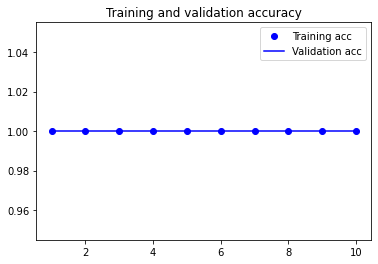

In [42]:
# Plotting the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

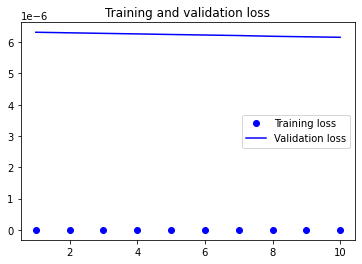

In [43]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

- In this case with randomly choosen 200 samples model is giving 100% accuarcy.

- Both training and validation accuarcy is 100%.

- But sometime the model may quickly starts overfitting, which is unsurprising given the small number of training samples. 

- Validation accuracy may also has high variance for the same reason.

- Note that our mileage may vary: because we have so few training samples, performance is heavily dependent on exactly which 200 samples you choose—and we’re choosing them at random. 

- If this works poorly for you, try choosing a different random set of 200 samples, for the sake of the exercise (in real life, we don’t get to
choose our training data).

- We can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer.

- In that case, We’ll learn a task specific embedding of the input tokens, which is generally more powerful than pretrained word embeddings when lots of data is available. 

- But in this case, we have only 200 training samples.

#### **Training the same model without pretrained word embeddings**

In [44]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [46]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 127ms/step - loss: 0.4499 - acc: 0.9400 - val_loss: 0.0903 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================] - 1s 88ms/step - loss: 0.0385 - acc: 1.0000 - val_loss: 0.0227 - val_acc: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 81ms/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 4/10
7/7 [==============================] - 1s 110ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 5/10
7/7 [==============================] - 1s 110ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 110ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 85ms/step - loss: 7.6301e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 8/10
7/7 [==============================] - 1s 111ms/step - loss: 4.6429e-04 - acc:

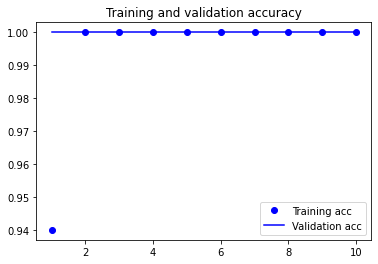

In [47]:
# Plotting the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

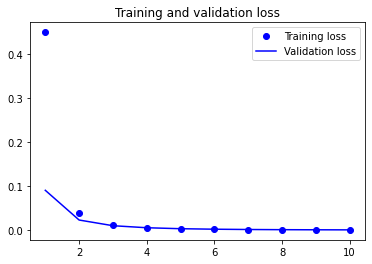

In [48]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

- If we increase the number of training samples, this will quickly stop being the case.

#### **Evaluate the model on the test data**


In [50]:
# Tokenizing the data of the test set

test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [51]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

#### **Next, load and evaluate the first model.**

In [52]:
# Evaluating the model on the test set

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 12.5004 - acc: 0.5000


[12.5004301071167, 0.5]

- we get an appalling test accuracy of 56%. Working with just a handful of training samples is difficult!

#### **Wrapping up**

- Now we’re able to do the following:
 - Turn raw text into something a neural network can process
 - Use the Embedding layer in a Keras model to learn task-specific token embeddings
 - Use pretrained word embeddings to get an extra boost on small naturallanguage-processing problems